# Homework #2 (due 10th of November, 11:59 PM):


### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


In [82]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
#This data set has 569 rows (cases) with 30 numeric features. The outcomes are either 1 - malignant, or 0 - benign.
dt = load_breast_cancer()
cancer = load_breast_cancer(as_frame=True)

In [83]:
#fit data into a data frame
cancerdf = cancer.frame


In [84]:
cancer

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [85]:
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [86]:
cancerdf.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [87]:
cancer_features =cancerdf.drop(columns='target')
cancer_features.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

<AxesSubplot:>

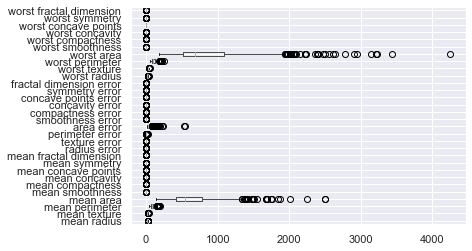

In [88]:
cancer_features.boxplot(vert=False)

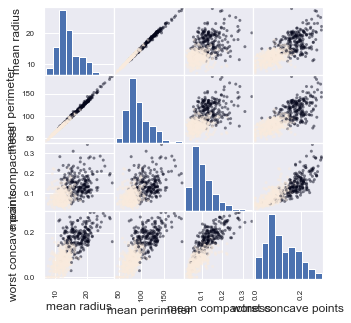

In [89]:
#plotting
pd.plotting.scatter_matrix(
    cancer_features[['mean radius', 'mean perimeter', 'mean compactness', 'worst concave points']],
    c=cancerdf.target, figsize=(5, 5));

<AxesSubplot:>

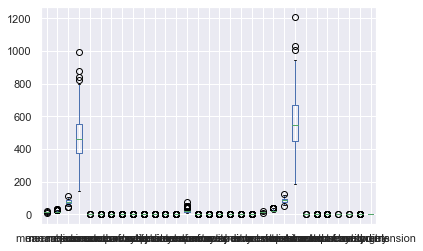

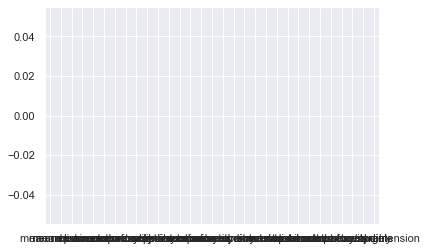

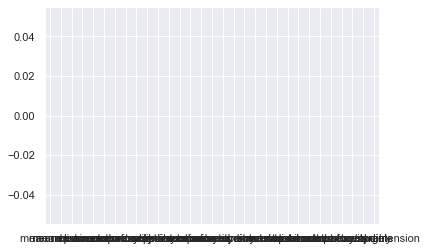

In [90]:
#plotting boxes
cancerdf[cancerdf['target']==1].plot.box()   
cancerdf[cancerdf['target']==2].plot.box()   
cancerdf[cancerdf['target']==5].plot.box()   

In [91]:
iris_df = pd.DataFrame(data=np.c_[dt['data'], dt['target']],columns= list(dt['feature_names']) + ['target'])

In [92]:
train_cancerdf, test_cancerdf = train_test_split(cancer_features, test_size=0.5, random_state=10, shuffle=True)


In [93]:
print(len(train_cancerdf),len(test_cancerdf))

284 285


In [94]:
#Using train_test_split().
train_cancerdf, test_cancerdf = train_test_split(iris_df)
print(len(train_cancerdf),len(test_cancerdf))

display(train_cancerdf)

426 143


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
392,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,0.06744,...,29.41,142.10,1359.0,0.1681,0.39130,0.55530,0.21210,0.3187,0.10190,0.0
222,10.180,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,0.06908,...,22.84,71.94,375.6,0.1406,0.14400,0.06572,0.05575,0.3055,0.08797,1.0
406,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,19.58,115.90,947.9,0.1206,0.17220,0.23100,0.11290,0.2778,0.07012,1.0
132,16.160,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,31.68,129.70,1175.0,0.1395,0.30550,0.29920,0.13120,0.3480,0.07619,0.0
177,16.460,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,...,28.45,123.50,981.2,0.1415,0.46670,0.58620,0.20350,0.3054,0.09519,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,29.09,97.58,729.8,0.1216,0.15170,0.10490,0.07174,0.2642,0.06953,1.0
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,...,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116,1.0
509,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,...,36.33,117.70,909.4,0.1732,0.49670,0.59110,0.21630,0.3013,0.10670,0.0
250,20.940,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,27.00,165.30,2010.0,0.1211,0.31720,0.69910,0.21050,0.3126,0.07849,0.0


In [95]:
#Using DecisionTreeClassifier, fit a classifier with X_train, y_train and using one nearest neighbor.
tree = DecisionTreeClassifier(max_depth=5)

In [96]:
tree.fit(train_cancerdf.drop('target', axis=1), train_cancerdf['target'])

DecisionTreeClassifier(max_depth=5)

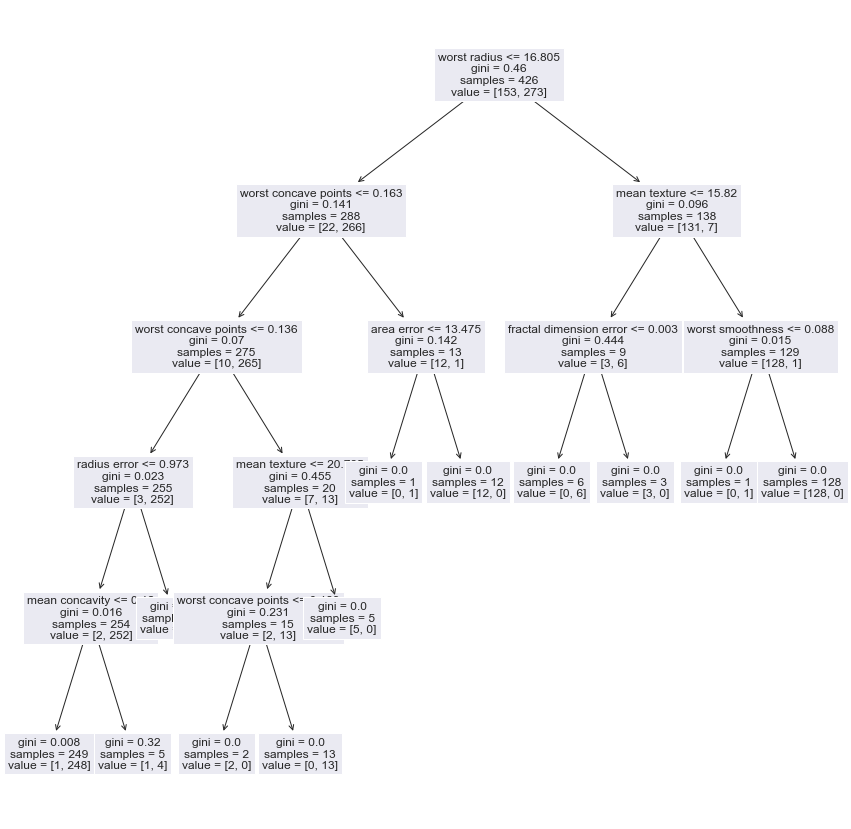

In [97]:
#plotting
pyplot.figure(figsize=(15,15))
from sklearn import tree as tr
tr.plot_tree(tree, feature_names=dt['feature_names'], fontsize=12)
pyplot.show()

In [98]:
cancer_cancerdf=shuffle(pd.DataFrame(data=np.c_[dt['data'], dt['target']],columns= list(dt['feature_names']) + ['target']))

In [99]:
cancer_cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
257,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.12420,0.2398,0.07596,...,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910,0.0
191,12.77,21.41,82.02,507.4,0.08749,0.06601,0.03112,0.02864,0.1694,0.06287,...,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871,1.0
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964,0.0
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,21.08,92.80,599.5,0.15470,0.22310,0.17910,0.11550,0.2382,0.08553,1.0
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,...,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824,1.0


In [100]:
#creating linear regression 
logreg = LogisticRegression(C=0.01, max_iter=1000)
logreg.fit(train_cancerdf.drop(['target'], axis=1),train_cancerdf['target']) 


LogisticRegression(C=0.01, max_iter=1000)

In [101]:
#split X and y into training and test sets (X_train, X_test, y_train, and y_test).
X = dt.data
y = dt.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [102]:
train_test_split(y, shuffle=True)

[array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 

In [103]:
#importing libraries
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [104]:
kfold = model_selection.KFold(n_splits=10,random_state=None)

In [105]:
#creating the lr with all features
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

In [106]:
#The score array for train scores on each split.
def train_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    scores = {}
    for name, models in models.append():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
        return scores

### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [107]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
sns.set()
train = pd.read_csv("winequality_white.csv")
test = pd.read_csv("winequality_white.csv")


In [108]:
#The following code fetches the csv file and saves it into your current directory.
data= pd.read_csv("winequality_white.csv", sep=";")

In [109]:
#Split the Data into X(the data) and y(the labels).
X = data
y = data.iloc[:,-1:]

In [110]:
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [111]:
a = pd.concat([data.isnull().sum()], axis=1, keys=['quality'])
a[a.sum(axis=1) > 0]

,quality


In [112]:
response = ['quality']
exp = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol", "quality"]


In [113]:
print(X.shape)
print(y.shape)

(4898, 12)
(4898, 1)


In [114]:
#A decision tree regressor.
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [115]:
#split X and y into training and test sets (X_train, X_test, y_train, and y_test).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.5)

In [116]:
#Split arrays or matrices into random train and test subsets.
data_train, data_test_hold = train_test_split(data, test_size=0.30, random_state=21)
data_test, data_hold = train_test_split(data_test_hold, test_size=0.33, random_state=21)

In [117]:
print(data.columns.values)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


In [118]:
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [119]:
#A decision tree classifier.
model = DecisionTreeClassifier(criterion='gini', splitter='best', 
                 max_depth=None, min_samples_split=2, 
                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                 max_features=None, random_state=None)

In [120]:
#References:
#   https://towardsdatascience.com/
#   https://github.com/
#   https://amueller.github.io/
#   https://stackoverflow.com/
#   https://www.kaggle.com/
#   https://scikit-learn.org/
#   https://medium.com/
#   https://realpython.com/
#   https://lightrun.com/
#   https://medium.datadriveninvestor.com/
#   https://discuss.analyticsvidhya.com/

        